# Simulator
Repository containing some standard simulation wrappers. For a detailed description of how to build the wrappers,
see the documentation for PET.

## Installation
Clone the repository and install it in editable mode by running
```bash
python3 -m pip install -e .
```

## Examples
The example demonstrates usage of [OPM-flow]{https://opm-project.org/}. To reproduce, ensure that OPM-flow is installed and in the path. This example uses the template from the [3Spot example]{https://github.com/Python-Ensemble-Toolbox/Examples/tree/main/3Spot}.

In [16]:
# import the flow class
from simulator.multphaseflow.opm import flow
# import datatime
import datetime as dt
# import numpy
import numpy as np

To initialllize the wrapper such that we get the needed outputs we must specify multiple inputs. This will typically be extracted from a config .toml file.

In [17]:
# a dictionary containing relevant information
input_dict = {'parallel':2,
             'simoptions': [['sim_flag', '--tolerance-mb=1e-5 --parsing-strictness=low']],
             'sim_limit': 4,
             'reportpoint': [dt.datetime(1994,2,9,00,00,00),
                            dt.datetime(1995,1,1,00,00,00),
                            dt.datetime(1996,1,1,00,00,00),
                            dt.datetime(1997,1,1,00,00,00),
                            dt.datetime(1998,1,1,00,00,00),
                            dt.datetime(1999,1,1,00,00,00)],
            'reporttype': "dates",
            'datatype': [
                "fopt",
                "fgpt",
                "fwpt",
                "fwit"],
             'runfile':'3well'}

# name of the runfile
filename = '3WELL'

In [18]:
# Generate an instance of the simulator class
sim = flow(input_dict=input_dict,filename=filename)

In [23]:
# Setup simulator
sim.setup_fwd_run(redund_sim=None)

The point of the simulator wrapper in PET is to generate the simulation response for an ensemble of parameters. The mako template file needs to render a DATA file for each uncertain parameter. Hence, the syntax of the mako file need to match the test one wants to run. It is up to the user to specify this file. In the 3Spot case, the uncertain parameter consists of the bhp controll for the wells. In the wrapper this is a dictionary with keys matching the variablename in the mako file.

In [24]:
state = {'injbhp':np.array([280,245]),
         'prodbhp':np.array([110])}

In [29]:
# we can now run the flow simulator
pred = sim.run_fwd_sim(state,member_i=0,del_folder=True)

In [30]:
pred

[{'fopt': array([[0.]]),
  'fgpt': array([[0.]]),
  'fwpt': array([[0.]]),
  'fwit': array([[0.]])},
 {'fopt': array([131.0504], dtype=float32),
  'fgpt': array([0.], dtype=float32),
  'fwpt': array([0.48596448], dtype=float32),
  'fwit': array([242.00461], dtype=float32)},
 {'fopt': array([276.51306], dtype=float32),
  'fgpt': array([0.], dtype=float32),
  'fwpt': array([0.857482], dtype=float32),
  'fwit': array([463.29108], dtype=float32)},
 {'fopt': array([420.74808], dtype=float32),
  'fgpt': array([0.], dtype=float32),
  'fwpt': array([1.1765413], dtype=float32),
  'fwit': array([675.35266], dtype=float32)},
 {'fopt': array([564.2478], dtype=float32),
  'fgpt': array([0.], dtype=float32),
  'fwpt': array([1.4610703], dtype=float32),
  'fwit': array([891.02484], dtype=float32)},
 {'fopt': array([707.78033], dtype=float32),
  'fgpt': array([0.], dtype=float32),
  'fwpt': array([1.720426], dtype=float32),
  'fwit': array([1110.3655], dtype=float32)}]

In [32]:
# we can make simple plot using matplotlib
import matplotlib.pyplot as plt
# Display plots inline in Jupyter
%matplotlib inline

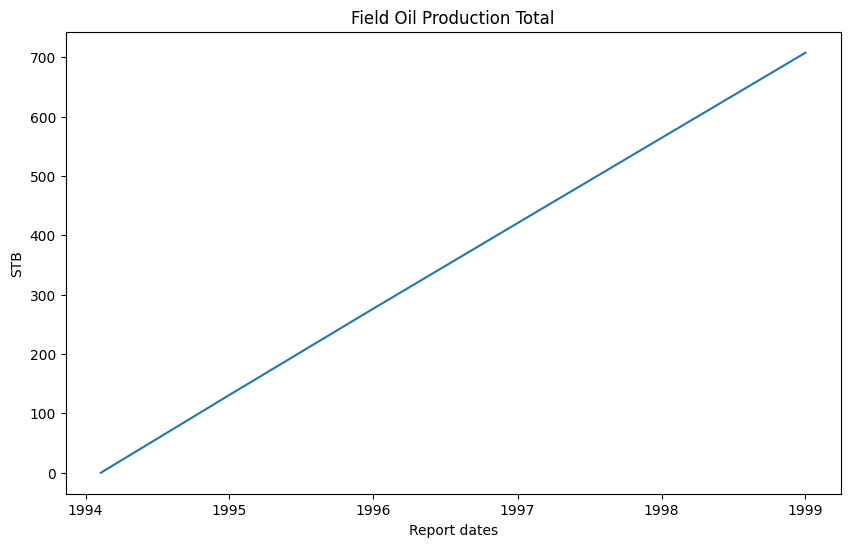

In [55]:
plt.figure(figsize=(10, 6));
plt.plot(input_dict['reportpoint'],np.concatenate(np.array([el['fopt'].flatten() for el in pred])));
plt.title('Field Oil Production Total');
plt.xlabel('Report dates');
plt.ylabel('STB');

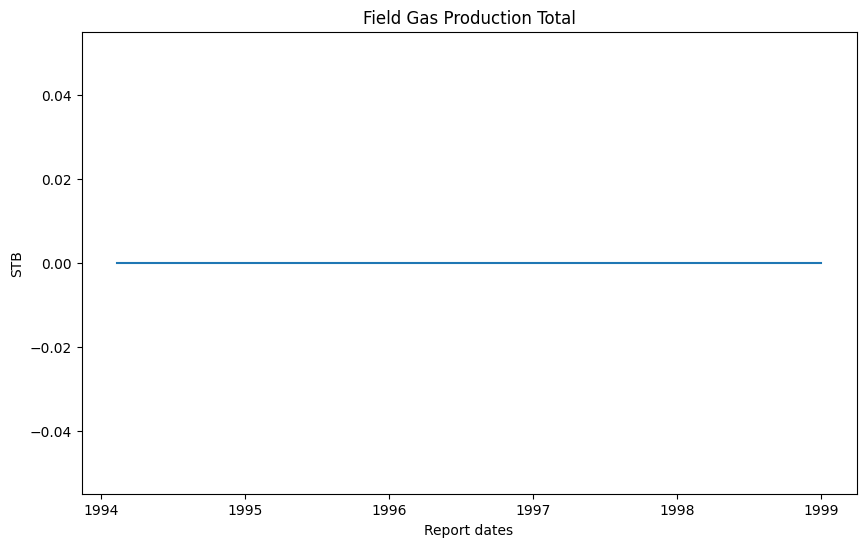

In [56]:
plt.figure(figsize=(10, 6));
plt.plot(input_dict['reportpoint'],np.concatenate(np.array([el['fgpt'].flatten() for el in pred])));
plt.title('Field Gas Production Total');
plt.xlabel('Report dates');
plt.ylabel('STB');

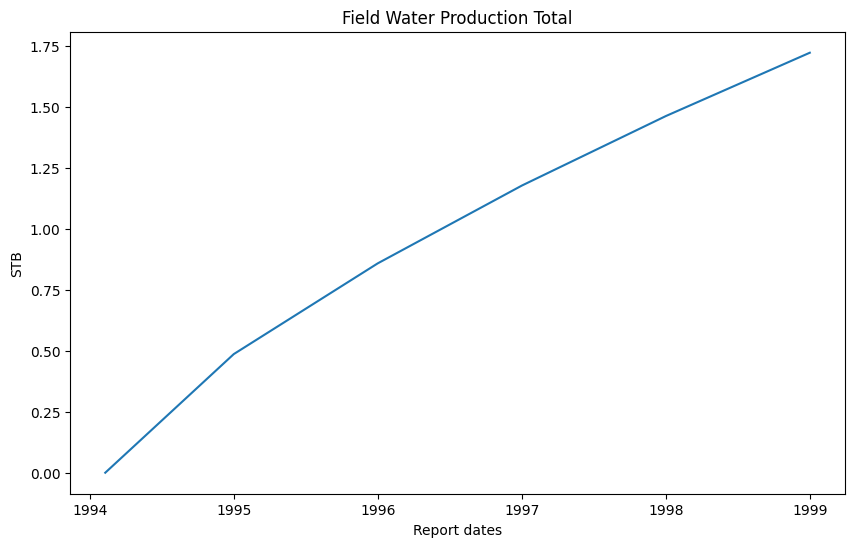

In [57]:
plt.figure(figsize=(10, 6));
plt.plot(input_dict['reportpoint'],np.concatenate(np.array([el['fwpt'].flatten() for el in pred])));
plt.title('Field Water Production Total');
plt.xlabel('Report dates');
plt.ylabel('STB');

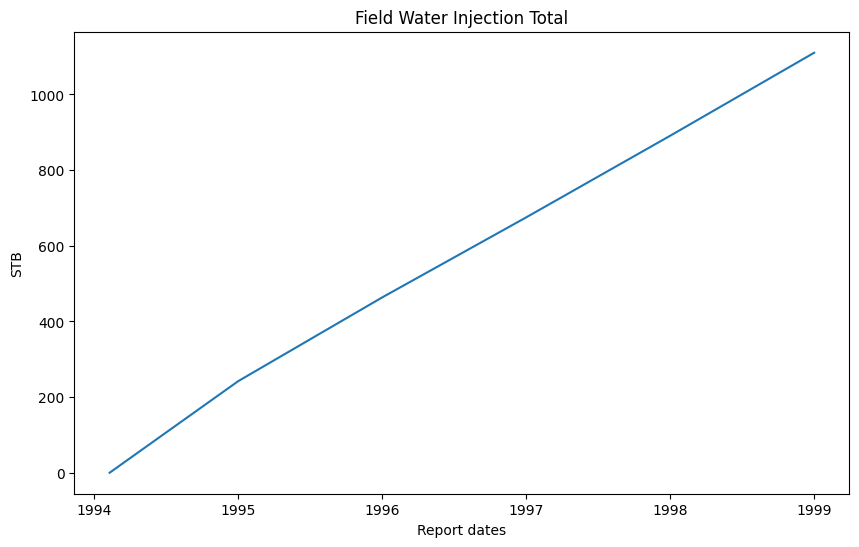

In [58]:
plt.figure(figsize=(10, 6));
plt.plot(input_dict['reportpoint'],np.concatenate(np.array([el['fwit'].flatten() for el in pred])));
plt.title('Field Water Injection Total');
plt.xlabel('Report dates');
plt.ylabel('STB');